# TP Chaînes de Markov-HMMs

# Partie I
## I.1 Fonctions dont vous pouvez avoir besoin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**cumsum** : fonction de répartition : somme cumulative des termes du vecteur p import numpy as np  
$np.cumsum(p)$  
**random** : génère un nombre aléatoire entre [0 1] selon une loi uniforme. import numpy as np  
$np.random.random()$  

### Création du dictionnaire clé-valeur associant états et caractères :

In [2]:
dic = {}
unicode_a = ord('a')
for k in range(1, 29):
    if k == 1 or k == 28:
        v = ' '
    else:
        v = chr(unicode_a + k-2)
    dic[k] = v
print(dic)

{1: ' ', 2: 'a', 3: 'b', 4: 'c', 5: 'd', 6: 'e', 7: 'f', 8: 'g', 9: 'h', 10: 'i', 11: 'j', 12: 'k', 13: 'l', 14: 'm', 15: 'n', 16: 'o', 17: 'p', 18: 'q', 19: 'r', 20: 's', 21: 't', 22: 'u', 23: 'v', 24: 'w', 25: 'x', 26: 'y', 27: 'z', 28: ' '}


### Inverser le dictionnaire (les valeurs deviennent les clés et réciproquement)

In [3]:
dic_inv = {v: k for k, v in dic.items()}
print(dic_inv)

{' ': 28, 'a': 2, 'b': 3, 'c': 4, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10, 'j': 11, 'k': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'v': 23, 'w': 24, 'x': 25, 'y': 26, 'z': 27}


## I.2 Chaîne de Markov
On veut générer des mots dans une langue donnée en modélisant la formation de ces mots par une chaîne de Markov. Les 28 états du modèle correspondent aux 26 lettres de l’alphabet auxquelles et on ajoute un état ‘espace initial’ (état 1) et un état ‘espace final’ (état 28) qui sert à terminer les mots.
La correspondance entre la valeur numérique d’un état et un caractère est la suivante : l’état 1 correspond à un espace (avant le début d’un mot) et l’état 28 à celui d’un espace en fin de
  MDI 341 Machine Learning Avancé
mot. Les états 2 à 27 correspondent aux caractères de a à z. On pourra utiliser une structure de dictionnaire en python pour faire cette correspondance.
On utilisera une chaîne de Markov ergodique entre les 26 états correspondants aux lettres de l’alphabet.

## I.2.a Matrice de transitions
'bigramenglish.txt' contient la matrice des transitions pour l’anglais (bigrams) entre deux symboles (caractères ou espaces). Le terme générique (i,j) de la matrice de transition correspond à la probabilité de transiter vers l’état j à partir de l’état i.

In [4]:
bi_en = np.loadtxt('bigramenglish.txt' )

In [5]:
# display
pd.DataFrame(bi_en)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.112687,0.043609,0.045455,0.032904,0.022094,0.041763,0.015556,0.064438,0.068920,...,0.025680,0.066916,0.164522,0.010388,0.007066,0.070502,0.000105,0.010599,0.000053,0.000000
1,0.0,0.000015,0.022934,0.033960,0.038076,0.000147,0.006174,0.024698,0.000882,0.037047,...,0.094822,0.095410,0.133486,0.011761,0.033372,0.009850,0.000588,0.019847,0.000882,0.067478
2,0.0,0.071874,0.000790,0.000079,0.000790,0.282758,0.000079,0.000079,0.000079,0.070295,...,0.047390,0.015007,0.010268,0.127162,0.001580,0.000079,0.000079,0.106627,0.000079,0.007108
3,0.0,0.136747,0.000041,0.017500,0.001221,0.136747,0.000041,0.000041,0.162794,0.073257,...,0.052501,0.000814,0.087095,0.031338,0.000041,0.000041,0.000041,0.005291,0.000041,0.019535
4,0.0,0.036241,0.000029,0.000029,0.007191,0.136911,0.000863,0.003739,0.000863,0.090028,...,0.018984,0.020134,0.000029,0.020422,0.002876,0.000863,0.000029,0.008629,0.000029,0.598844
5,0.0,0.045607,0.003171,0.018653,0.078064,0.027980,0.009606,0.007181,0.001679,0.016042,...,0.125630,0.072095,0.023317,0.000466,0.016601,0.008860,0.008394,0.015109,0.000093,0.360474
6,0.0,0.066869,0.000047,0.000047,0.000047,0.074351,0.033668,0.000047,0.000047,0.077625,...,0.090250,0.001870,0.046294,0.032733,0.000047,0.000047,0.000047,0.003273,0.000047,0.396540
7,0.0,0.065942,0.000611,0.000061,0.002442,0.128221,0.000061,0.012212,0.135548,0.062889,...,0.097081,0.026255,0.006106,0.021370,0.000061,0.000611,0.000061,0.003053,0.000061,0.315667
8,0.0,0.141975,0.000772,0.000019,0.000019,0.469715,0.000579,0.000019,0.000386,0.140239,...,0.011188,0.001736,0.024498,0.019097,0.000019,0.001157,0.000019,0.002122,0.000019,0.103009
9,0.0,0.020688,0.010501,0.076954,0.038085,0.033697,0.023666,0.034010,0.000016,0.000313,...,0.041063,0.127578,0.117547,0.000940,0.032600,0.000016,0.001097,0.000016,0.006269,0.024607


### A quelles probabilités correspond la première ligne de la matrice de transition ?
**Reponse:** la première ligne correspond aux probabilités de chaque lettre comme la première lettre du mot,  
le premièr et dernièr element sont 0, c'est a dire qu'il est obligé de générer un mot, donc de transiter depuis l'état initial vers l'état de l’alphabet.

In [6]:
print("Probabilités correspond la première ligne de la matrice de transition: \n", bi_en[0,:])

Probabilités correspond la première ligne de la matrice de transition: 
 [0.0000000e+00 1.1268720e-01 4.3608943e-02 4.5454545e-02 3.2904451e-02
 2.2094495e-02 4.1763341e-02 1.5555790e-02 6.4437882e-02 6.8920059e-02
 3.6384729e-03 4.2185193e-03 2.3465514e-02 3.9759544e-02 2.2832736e-02
 7.0343809e-02 3.1058848e-02 1.4237503e-03 2.5680236e-02 6.6916262e-02
 1.6452225e-01 1.0388104e-02 7.0660198e-03 7.0502004e-02 1.0546298e-04
 1.0599030e-02 5.2731491e-05 0.0000000e+00]


### et celles de la dernière colonne ?
**Reponse** la dernière ligne correspond aux probabilités de chaque lettre comme fin de mot.  
la dernière valeur est 1 et les autres sont 0, c'est a dire qu'il est obligé de transiter l'etat final vers l'etat final pour termier le mot.

In [7]:
print("Probabilité de la dernière colonne: \n", bi_en[:,-1])

Probabilité de la dernière colonne: 
 [0.0000000e+00 6.7478169e-02 7.1084433e-03 1.9535224e-02 5.9884373e-01
 3.6047379e-01 3.9653963e-01 3.1566736e-01 1.0300926e-01 2.4606608e-02
 9.5877277e-04 3.7225637e-01 1.5338255e-01 1.5795761e-01 2.9421872e-01
 1.2308174e-01 6.4222084e-02 1.3966480e-03 2.1088912e-01 4.3030156e-01
 2.2273059e-01 3.8466582e-02 9.9108028e-05 1.0216281e-01 1.2345679e-01
 7.7582944e-01 1.9193858e-03 1.0000000e+00]


### Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre.

In [8]:
for current_L, next_L in zip(dic.values(), np.argmax(bi_en, axis=1)+1):
    print(current_L, " ==> ", dic[next_L])

   ==>  t
a  ==>  n
b  ==>  e
c  ==>  o
d  ==>   
e  ==>   
f  ==>   
g  ==>   
h  ==>  e
i  ==>  n
j  ==>  o
k  ==>   
l  ==>  e
m  ==>  e
n  ==>   
o  ==>  n
p  ==>  e
q  ==>  u
r  ==>  e
s  ==>   
t  ==>  h
u  ==>  r
v  ==>  e
w  ==>  a
x  ==>  t
y  ==>   
z  ==>  e
   ==>   


# I.2.b Générer un mot

### Ecrire une fonction etat_suivant qui génère un état (à t+1) à partir de l’état courant (à t) et à l’aide de la matrice de transitions et de la fonction de répartition.

In [9]:
def etat_suivant(current_state, transition_matrix):
    current_row = transition_matrix[current_state-1, :]
    # fonction de répartition est cumsum
    cs = np.cumsum(current_row)
    return sum(cs < np.random.random()) + 1

In [10]:
# test
etat_suivant(1, bi_en)

14

### Afficher sur un graphique la fonction de répartition pour une ligne de la matrice de transition et expliquer son rôle pour la génération de l’état à t+1.

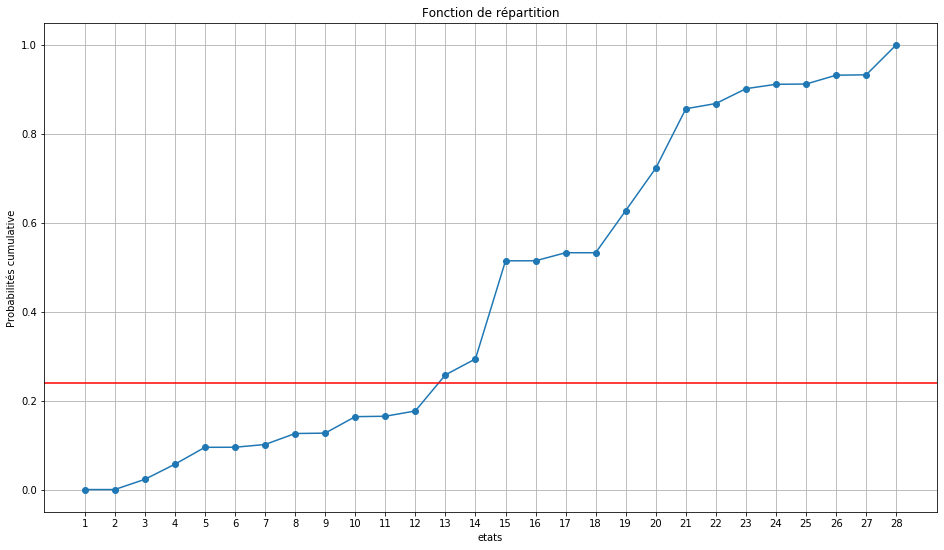

In [11]:
row_display = bi_en[1,:]

plt.figure(figsize=(16,9))
plt.title("Fonction de répartition")

plt.plot(range(1, 29), np.cumsum(row_display), "o-")
plt.axhline(np.random.random(), c='red')
plt.xticks(range(1, 29))
plt.grid(True)
plt.xlabel("etats")
plt.ylabel("Probabilités cumulative")
plt.show()

### Expliquer son rôle pour la génération de l’état à t+1.
**Reponse:** La fonction de répartition est cumulative, sa valuer est entre 0 et 1, les différences probabilités cumulatives entre l'état adjacent correspond bien la probabilité d'état, un nombre aléatoire entre 0 et 1 permet de choisir l'etat suivant

### Utiliser cette fonction pour écrire la fonction genere_state_seq qui génère une séquence d’états jusqu’à aboutir à l’état final (28).

In [12]:
def genere_state_seq(transition_matrix) :
    state = 1
    seq = []        
    while state != transition_matrix.shape[0] :
        state = etat_suivant(state, transition_matrix)
        seq.append(state)
    return seq

In [13]:
# un test
genere_state_seq(bi_en)

[21, 9, 6, 4, 16, 28]

#### Ecrire une fonction display_seq qui transforme une séquence d’états en séquence de caractères

In [14]:
def display_seq(state_seq, dic):
    letter = [dic[s] for s in state_seq]
    return ''.join(letter)

#### Utiliser ces fonctions pour générer des mots et donner des exemples de mots générés

In [15]:
print("Générer 10 mots pour test: \n")

for i in range(10):
    print(display_seq(genere_state_seq(bi_en), dic))

Générer 10 mots pour test: 

ofofferof 
ce 
d 
curipe 
the 
hetes 
a 
itol 
shatas 
ghis 


## I.2.c Générer une phrase
On veut générer une suite de mots (phrase). Créer un état final de phrase (état 29, correspondant au caractère . ) dont la probabilité de transition vers cet état depuis un état final de mot est 0.1. 

#### Ecrire une fonction modifie_mat_dic qui modifie la matrice de transition et le dictionnaire en conséquence

In [16]:
def modifie_mat_dic(transition_matrix, dic, dic_changes):
    return modifie_mat(transition_matrix), modifie_dic(dic, dic_changes)

def modifie_mat(transition_matrix) :
    # add new row
    transition_matrix_new = np.vstack((transition_matrix, np.zeros(28)))
    
    # add new col
    transition_matrix_new = np.hstack((transition_matrix_new, np.zeros(29).reshape(-1,1)))
    
    transition_matrix_new[-1,-1] = 1
    
    # change old last row
    transition_matrix_new[-2] = 0
    transition_matrix_new[-2, 0] = 0.9
    transition_matrix_new[-2, -1] = 0.1
    
    return transition_matrix_new

def modifie_dic(dic, dic_changes):
    dic_new = dic.copy()
    for k, v in dic_changes.items():
        dic_new[k] = v
    return dic_new


In [17]:
bi_en_new, dic_new = modifie_mat_dic(bi_en, dic, {28:'', 29:'.'})

print("Générer 10 phrase pour test: \n")

for i in range(10):
    print(display_seq(genere_state_seq(bi_en_new), dic_new))

Générer 10 phrase pour test: 

angtoumaner.
r.
d methe ys bovintha t mourache t d an te eny tilawits.
pede antorks s.
bus faly f lend th ord tustocts tor te to withinise tave byevof ery int hasiofthre ss opres t htolouldoun mourit be.
al gadiostamasce big t hed wateithim blerthe uptedaly acount bers id mid.
hove sarar gone pryemas lulimer theewis coondert ioner ibubasuiscare.
bema of wes a i d.
hor pourmyo.
pus rt fred wonye.


## I.3. Reconnaissance de la langue
Charger la matrice des transitions entre caractères pour le français. Ecrire une fonction calc_vraisemblance qui calcule la vraisemblance du modèle français pour une phrase donnée en multipliant les probabilités de transition. Pour tenir compte de toutes les transitions (notamment celles entre espaces de fin et de début de mots et vers la fin de phrase) on pourra transformer une séquence « mot1 mot2.» par la séquence « -mot1+-mot2+.», les signes - , + et . représentant l’état initial de mot, l’état final de mot et l’état final de phrase, respectivement.
Calculer la vraisemblance des modèles français et anglais pour la phrase « to be or not to be ». De même calculer la vraisemblance des modèles français et anglais pour la phrase « etre ou ne pas etre ».

In [18]:
bi_fr = np.loadtxt('bigramfrancais.txt')
bi_fr_new, dic_signe= modifie_mat_dic(bi_fr, dic_new, {1:'-', 28: '+'})
pd.DataFrame(bi_fr_new)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.076217,0.011726,0.070354,0.206175,0.067422,0.021497,0.010748,0.000977,0.019543,...,0.060582,0.013680,0.034200,0.006840,0.000098,0.000098,0.000098,0.000977,0.000000,0.0
1,0.0,0.000341,0.003414,0.023899,0.003414,0.000341,0.010242,0.013657,0.000341,0.058040,...,0.081939,0.119495,0.133151,0.020485,0.000341,0.000341,0.000341,0.000341,0.157050,0.0
2,0.0,0.030992,0.001033,0.001033,0.001033,0.020661,0.001033,0.001033,0.001033,0.289256,...,0.010331,0.001033,0.185950,0.001033,0.001033,0.001033,0.001033,0.001033,0.001033,0.0
3,0.0,0.040241,0.000402,0.008048,0.008048,0.301811,0.000402,0.000402,0.060362,0.209256,...,0.000402,0.040241,0.040241,0.000402,0.000402,0.000402,0.000402,0.000402,0.032193,0.0
4,0.0,0.036174,0.000402,0.000402,0.000402,0.546624,0.004019,0.000402,0.000402,0.124598,...,0.008039,0.000402,0.056270,0.000402,0.000402,0.000402,0.000402,0.000402,0.080386,0.0
5,0.0,0.001117,0.029034,0.023451,0.005583,0.012284,0.010050,0.004467,0.000112,0.003350,...,0.173088,0.045784,0.032384,0.006700,0.000112,0.008934,0.000112,0.001117,0.337242,0.0
6,0.0,0.088496,0.001475,0.001475,0.001475,0.176991,0.088496,0.001475,0.001475,0.265487,...,0.044248,0.014749,0.029499,0.001475,0.001475,0.001475,0.001475,0.001475,0.001475,0.0
7,0.0,0.051348,0.001284,0.001284,0.001284,0.115533,0.001284,0.001284,0.001284,0.462131,...,0.001284,0.001284,0.064185,0.001284,0.001284,0.001284,0.001284,0.001284,0.012837,0.0
8,0.0,0.218579,0.005464,0.005464,0.005464,0.437158,0.005464,0.005464,0.005464,0.163934,...,0.005464,0.005464,0.005464,0.005464,0.005464,0.005464,0.005464,0.005464,0.054645,0.0
9,0.0,0.065735,0.092440,0.145850,0.004108,0.112983,0.028759,0.014380,0.000205,0.000205,...,0.110929,0.071898,0.002054,0.018488,0.000205,0.000205,0.000205,0.000205,0.030813,0.0


In [19]:
print(dic_signe)

{1: '-', 2: 'a', 3: 'b', 4: 'c', 5: 'd', 6: 'e', 7: 'f', 8: 'g', 9: 'h', 10: 'i', 11: 'j', 12: 'k', 13: 'l', 14: 'm', 15: 'n', 16: 'o', 17: 'p', 18: 'q', 19: 'r', 20: 's', 21: 't', 22: 'u', 23: 'v', 24: 'w', 25: 'x', 26: 'y', 27: 'z', 28: '+', 29: '.'}


In [20]:
dic_signe_inv = {v:k for k, v in dic_signe.items()}
print(dic_signe_inv)

{'-': 1, 'a': 2, 'b': 3, 'c': 4, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10, 'j': 11, 'k': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'v': 23, 'w': 24, 'x': 25, 'y': 26, 'z': 27, '+': 28, '.': 29}


In [21]:
def reformat_phrase(phrase):
    phrase = phrase.replace('.','')
    return ''.join(['-'+w+'+' for w in phrase.split(' ')])+'.'

In [22]:
def calc_vraisemblance(phrase, transition_matrix, dic_signe_inv):
    phrase_signe = reformat_phrase(phrase)
    vraisemblance = 1
    for i in range(len(phrase_signe)-1):
        current_state = dic_signe_inv[phrase_signe[i]]
        next_state = dic_signe_inv[phrase_signe[i+1] ]
        vraisemblance *= transition_matrix[current_state-1, next_state-1]
    return vraisemblance

In [23]:
phrase_en = "to be or not to be"
phrase_fr = "etre ou ne pas etre"
print(reformat_phrase(phrase_en))
print(reformat_phrase(phrase_fr))

-to+-be+-or+-not+-to+-be+.
-etre+-ou+-ne+-pas+-etre+.


In [24]:
vraisemblance_en_en = calc_vraisemblance(phrase_en, bi_en_new, dic_signe_inv)
vraisemblance_en_fr = calc_vraisemblance(phrase_fr, bi_en_new, dic_signe_inv)

vraisemblance_fr_en = calc_vraisemblance(phrase_en, bi_fr_new, dic_signe_inv)
vraisemblance_fr_fr = calc_vraisemblance(phrase_fr, bi_fr_new, dic_signe_inv)

print("La vraisemblance de modèle anglais pour la phrase « to be or not to be »: \n", vraisemblance_en_en)
print("La vraisemblance de modèle anglais pour la phrase « etre ou ne pas etre »: \n", vraisemblance_en_fr)

print("La vraisemblance de modèle français pour la phrase « to be or not to be »: \n", vraisemblance_fr_en)
print("La vraisemblance de modèle français pour la phrase « etre ou ne pas etre »: \n", vraisemblance_fr_fr)


La vraisemblance de modèle anglais pour la phrase « to be or not to be »: 
 8.112892227809415e-20
La vraisemblance de modèle anglais pour la phrase « etre ou ne pas etre »: 
 4.462288711775253e-24
La vraisemblance de modèle français pour la phrase « to be or not to be »: 
 5.9602081018686406e-30
La vraisemblance de modèle français pour la phrase « etre ou ne pas etre »: 
 1.145706887234789e-19


**Remarque:** La vraisemblance est plus élevée, quand on la calcule avec la langue avec sa modele de langue correcte.

In [25]:
def get_language(phrase, bi_en_new, bi_fr_new, dic_signe_inv):
    vrai_en = calc_vraisemblance(phrase, bi_en_new, dic_signe_inv)
    vrai_fr  = calc_vraisemblance(phrase, bi_fr_new, dic_signe_inv)
    if (vrai_en > vrai_fr):
        return "English"
    else:
        return "French"

In [26]:
# test
print("'to be or not to be' is ", get_language("to be or not to be", bi_en_new, bi_fr_new, dic_signe_inv))
print("'etre ou ne pas etre' is ", get_language("etre ou ne pas etre", bi_en_new, bi_fr_new, dic_signe_inv))


'to be or not to be' is  English
'etre ou ne pas etre' is  French


# Partie II

## II. 1. Introduction


## II. 2. Génération de séquences d’observations
Les matrices A0.txt, B0.txt, vect_p0.txt contiennent les matrices A, B, et le vecteur π correspondant au modèle de Markov caché du chiffre 0. Le fichier matrice_symboles.txt contient le dictionnaire. Charger ces fichiers depuis le site pédagogique.


In [27]:
A0 = np.loadtxt("./data_txt_compact/A0.txt")
B0 = np.loadtxt("./data_txt_compact/B0.txt")
pi0 = np.loadtxt("./data_txt_compact/vect_pi0.txt")
v = np.loadtxt("./data_txt_compact/matrice_symboles.txt")

In [28]:
print(A0.shape)
print(B0.shape)
print(pi0.shape)
print(v.shape)

(5, 5)
(32, 5)
(5,)
(5, 32)


### II. 2.1 A quoi correspondent les zéros de la matrice B ? et ceux de la matrice A et du vecteur π?

**Reponse :**   
La matrice B contient les probabilités d'observations (symboles) depuis les états, donc les zéros correspondent aux symboles qui ne peuvent être obtenu par l'état, par exemple: si B(i, j) = 0, l'etat (j+1) pout pas obtenir symbole (i+1)  
  
La matrice A contient les probabilités de transition entre 2 états, donc les zéros correspondent aux états qui ne peuvent pas transiter vers autres états, par exemple: si A(i, j) = 0, l'etat (i+1) pout pas transiter a l'etat (j+1)  
  
Vecteur pi contient les probabilités initiales des états, si la valeur est 0, on ne veut pas démarrer par l'état correspondent, par exemple, si pi[i] = 0, on ne commence pas par l'état (i+1)

In [29]:
pd.DataFrame(B0)

,0,1,2,3,4
0,1.0,-0.000000,-0.000000,-0.000000,1.0
1,-0.0,0.000348,0.000409,0.000409,-0.0
2,-0.0,0.000348,0.000409,0.018038,-0.0
3,-0.0,0.077917,0.000409,0.129038,-0.0
4,-0.0,0.011896,0.016747,0.000409,-0.0
5,-0.0,0.000348,0.000409,0.000409,-0.0
6,-0.0,0.000348,0.002605,0.000031,-0.0
7,-0.0,0.000348,0.000409,0.000409,-0.0
8,-0.0,0.000348,0.024108,0.000409,-0.0
9,-0.0,0.000348,0.000409,0.000409,-0.0


In [30]:
pd.DataFrame(A0)

,0,1,2,3,4
0,0.841781,0.158219,-0.000000,-0.000000,-0.000000
1,-0.000000,0.788616,0.211384,-0.000000,-0.000000
2,-0.000000,-0.000000,0.863397,0.136603,-0.000000
3,-0.000000,-0.000000,-0.000000,0.791502,0.208498
4,-0.000000,-0.000000,-0.000000,-0.000000,1.000000


In [31]:
pi0

array([1., 0., 0., 0., 0.])

In [32]:
pd.DataFrame(v)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


### II.2.2 Ecrire une fonction etat_suivant qui génère un état qt+1(à t+1) à partir de l’état courant qt (à t) à l’aide de la matrice de transitions et de la fonction de répartition cumsum.

In [33]:
def etat_suivant(current_state, transition_matrix):
    current_row = transition_matrix[current_state-1, :]
    # fonction de répartition est cumsum
    cs = np.cumsum(current_row)
    return sum(cs < np.random.random()) + 1

#### Afficher la fonction de répartition pour une ligne de la matrice de transition

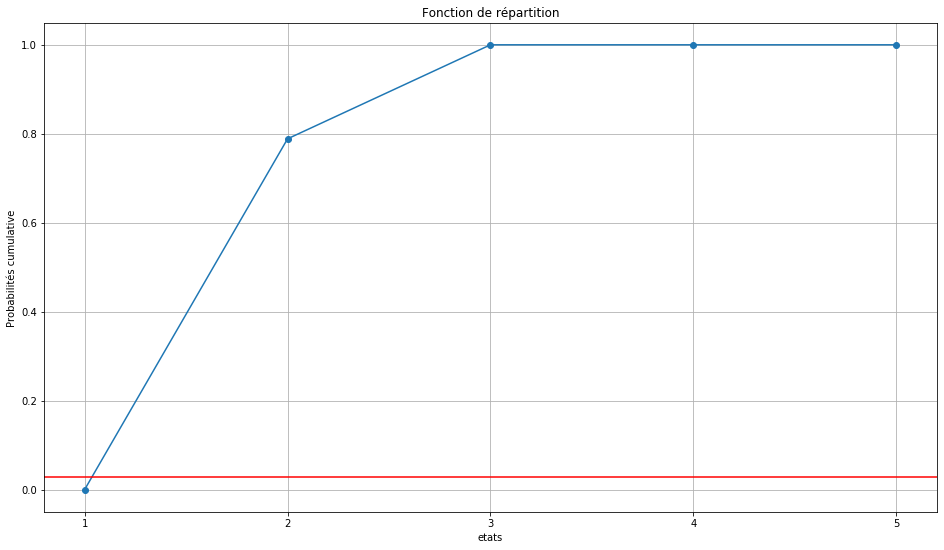

In [34]:
row_display = A0[1,:]

plt.figure(figsize=(16,9))
plt.title("Fonction de répartition")

plt.plot(range(1, 6), np.cumsum(row_display), "o-")
plt.axhline(np.random.random(), c='red')
plt.xticks(range(1, 6))
plt.grid(True)
plt.xlabel("etats")
plt.ylabel("Probabilités cumulative")
plt.show()

###  et expliquer son rôle pour la génération de l’état à t+1.
La fonction de répartition est cumulative, sa valuer est entre 0 et 1, les différences probabilités cumulatives entre l'état adjacent correspond bien la probabilité d'état, un nombre aléatoire entre 0 et 1 permet de choisir l'etat suivant

### II.2.3 Générer une séquence d’observations suivant le modèle de Markov Caché du chiffre 0.
On commencera par générer une séquence d’états suivant ce modèle à l’aide de la fonction etat_suivant. Puis on générera la séquence d’observations par le même procédé.

In [35]:
def genere_state_obs_seq(trans_matrix, obs_matrix):
    state = obs = 1
    state_seq = []
    obs_seq = []
    while state != trans_matrix.shape[0] :
        state = etat_suivant(state, trans_matrix)
        state_seq.append(state)
        
        obs = etat_suivant(state, obs_matrix.T)
        obs_seq.append(obs)
    return state_seq, obs_seq


In [36]:
state_seq_0, obs_seq_0 = genere_state_obs_seq(A0, B0)
print("séquence d’états du chiffre 0: \n", state_seq_0)
print("séquence d’observations du chiffre 0: \n", obs_seq_0)

séquence d’états du chiffre 0: 
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5]
séquence d’observations du chiffre 0: 
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 23, 23, 23, 18, 18, 12, 12, 12, 28, 5, 18, 12, 28, 12, 18, 18, 27, 12, 23, 1]


### II.2.4 Visualiser le résultat sous forme d’image.

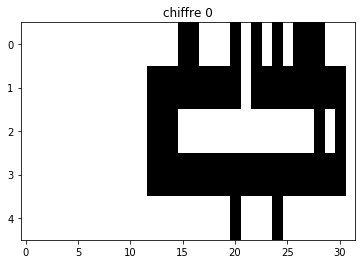

In [37]:
def display_image(obs_seq, v):
    im=[]
    # les x contiennent les index dans le dictionnaire 
    for t in range (0,len(obs_seq)):
        im_col=v[:, obs_seq[t]-1]
        im.append(im_col)
    im = np.array(im).T # now make an array
    plt.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')
plt.title("chiffre 0")    
display_image(obs_seq_0, v)

### Générer des séquences pour le chiffre 7 et le chiffre 1 (matrices B1.txt, B7.txt, etc...)

In [38]:
A1 = np.loadtxt("./data_txt_compact/A1.txt")
B1 = np.loadtxt("./data_txt_compact/B1.txt")
pi1 = np.loadtxt("./data_txt_compact/vect_pi1.txt")

A7 = np.loadtxt("./data_txt_compact/A7.txt")
B7 = np.loadtxt("./data_txt_compact/B7.txt")
pi7 = np.loadtxt("./data_txt_compact/vect_pi7.txt")

In [39]:
state_seq_1, obs_seq_1 = genere_state_obs_seq(A1, B1)
state_seq_7, obs_seq_7= genere_state_obs_seq(A7, B7)

print("séquence d’états du chiffre 1: \n", state_seq_1)
print("séquence d’observations du chiffre 1: \n", obs_seq_1)
print("")
print("séquence d’états du chiffre 7: \n", state_seq_7)
print("séquence d’observations du chiffre 7: \n", obs_seq_7)

séquence d’états du chiffre 1: 
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 4, 4, 4, 5]
séquence d’observations du chiffre 1: 
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 23, 27, 23, 27, 30, 27, 14, 27, 5, 1]

séquence d’états du chiffre 7: 
 [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5]
séquence d’observations du chiffre 7: 
 [1, 11, 3, 11, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 23, 30, 23, 30, 30, 24, 23, 23, 24, 30, 10, 30, 23, 24, 24, 11, 11, 11, 3, 4, 3, 3, 1]


In [40]:
def display_multi_image(number):
    plt.figure(figsize=(20,8))
    plt.suptitle(f"chiffre {number}")
    for i in range(1, 11):
        plt.subplot(2,5,i)
        state_seq, obs_seq = genere_state_obs_seq(eval(f'A{number}'), eval(f'B{number}'))
        display_image(obs_seq, v)

#### Visualiser le résultat sous forme d’image pour chiffre 0 avec 10 exemples

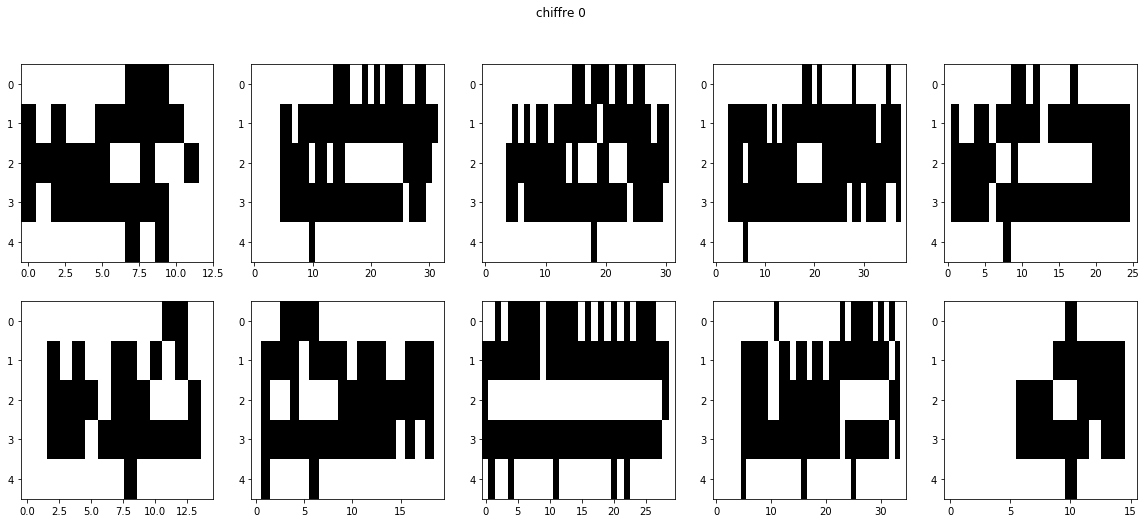

In [41]:
# Visualiser le résultat sous forme d’image pour chiffre 0 avec 10 exemples
display_multi_image(0)

#### Visualiser le résultat sous forme d’image pour chiffre 1 avec 10 exemples

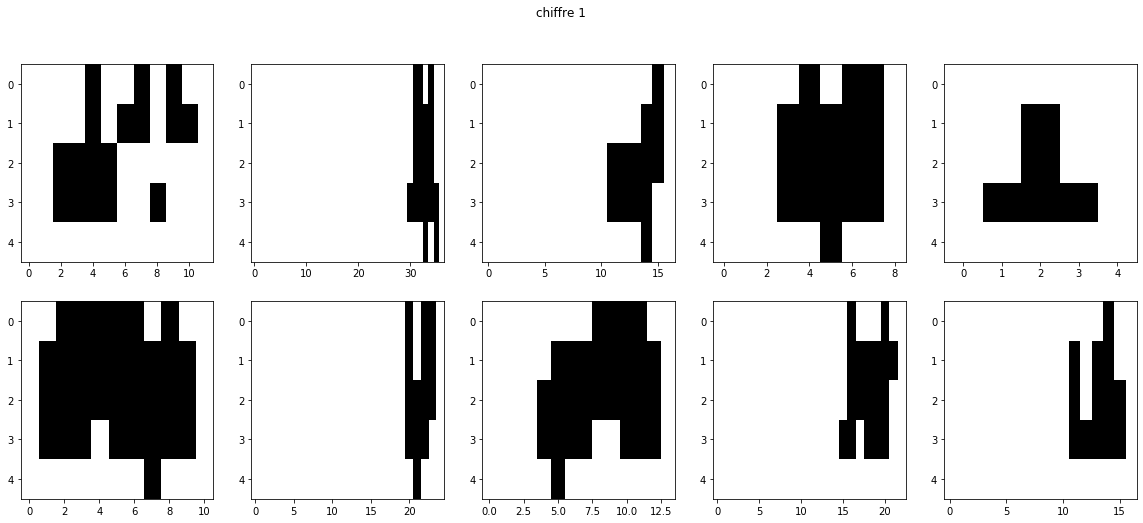

In [42]:
# Visualiser le résultat sous forme d’image pour chiffre 1 avec 10 exemples
display_multi_image(1)

#### Visualiser le résultat sous forme d’image pour chiffre 7 avec 10 exemples

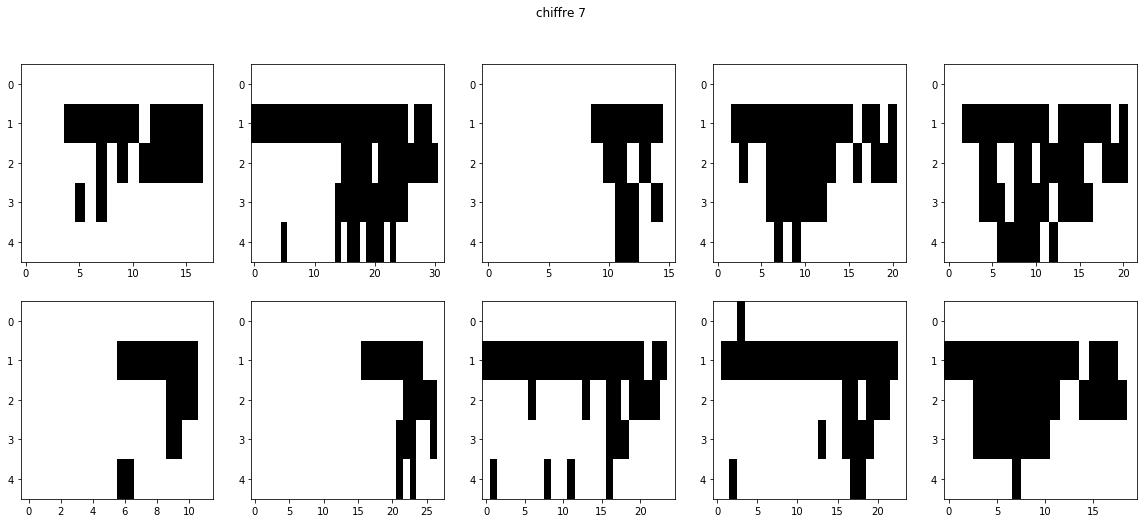

In [43]:
# Visualiser le résultat sous forme d’image pour chiffre 7 avec 10 exemples
display_multi_image(7)

## II.3. Calcul de la vraisemblance de séquences d’observations
Les fichiers SeqTest0.txt, SeqTest1.txt, SeqTest7.txt contiennent chacun 10 séquences d’observations de chiffres des 3 classes 0, 1 et 7, disposés en ligne. Le script suivant extrait la 5ème observation de la 3ème séquence des chiffres 0.

In [44]:
SeqTest0 = np.loadtxt('./data_txt_compact/SeqTest0.txt').astype(int)
SeqTest1 = np.loadtxt('./data_txt_compact/SeqTest1.txt').astype(int)
SeqTest7 = np.loadtxt('./data_txt_compact/SeqTest7.txt').astype(int)

In [45]:
pd.DataFrame(SeqTest0)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,1,1,1,1,14,14,14,23,...,18,18,23,23,14,1,1,1,1,1
1,1,1,1,1,1,4,14,23,23,23,...,27,23,23,11,3,1,1,1,1,1
2,1,1,1,1,1,4,14,14,23,23,...,23,23,23,11,11,4,4,1,1,1
3,1,1,1,1,4,14,23,23,12,12,...,18,12,23,23,11,1,1,1,1,1
4,1,1,1,1,1,1,11,11,27,27,...,14,14,23,23,11,11,1,1,1,1
5,1,1,1,1,1,1,1,14,14,23,...,12,23,23,23,4,1,1,1,1,1
6,1,1,1,1,1,14,14,14,14,23,...,23,23,11,11,11,11,11,1,1,1
7,1,1,1,1,1,1,1,14,23,23,...,23,23,11,11,1,1,1,1,1,1
8,1,1,1,1,1,14,23,23,23,23,...,12,12,23,23,23,23,4,1,1,1
9,1,1,1,1,1,1,1,1,1,1,...,23,11,1,1,1,1,1,1,1,1


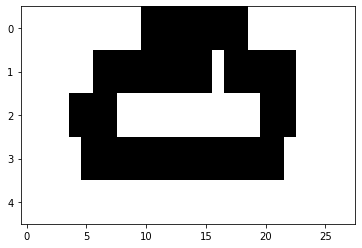

In [46]:
# test
display_image(SeqTest0[3,:], v)

### II.3.1 Calculer la vraisemblance de ces séquences suivant chacun des modèles (0, 1 et 7) par l’algorithme de Viterbi

In [47]:
def log_matrix(M):
    M_cp = M.copy()
    # set value 0 to a very small value to prevent divide by zero encountered in log
    M_cp[M_cp==0] = 1e-50
    return np.log(M_cp)

In [48]:
def calc_vraisemblance_viterbi(A, B, pi, seq):
    #prepare table delta et phi
    nb_states = A.shape[0]
    nb_seq = seq.shape[0]
    table_delta = np.zeros((nb_states, nb_seq))
    table_phi = np.zeros((nb_states, nb_seq))
    
    #convert the matrices with log
    log_A = log_matrix(A)
    log_B = log_matrix(B)
    log_pi = log_matrix(pi)

    # 1ere colonne: Initialisation
    # δ1(i)=P(q1 =i,o1)=bi(o1)πi i=1,...Q
    b = log_B[seq[0]-1]
    table_delta[:,0] = b + log_pi # change '*' to '+' because of log

    # the rest colonnes
    for t in range(1, nb_seq):
        delta_prev = table_delta[:,t-1]
        for st in range(nb_states):
            a = log_A[:,st]
            b = log_B[seq[t]-1, st]
            values = delta_prev + a + b
            table_phi[st, t] = np.argmax(values) + 1
            table_delta[st, t] = np.amax(values)
            
#     return table_delta, table_phi
    return np.amax(table_delta[:,-1])



In [49]:
def compare_vrai(SeqTest):
    like_dic = {}
    for n in [0, 1, 7]:
        like_dic[n] = []
        for i, seq in enumerate(SeqTest):
            like_dic[n].append(calc_vraisemblance_viterbi(eval(f"A{n}"), eval(f"B{n}"), eval(f"pi{n}"), seq))
    return pd.DataFrame(like_dic)

#### Log vraissemblances pour les 10 séquences d’observations de chiffre 0 avec les modèles (0, 1 et 7)

In [50]:
like_SeqTest0 = compare_vrai(SeqTest0)
like_SeqTest0

,0,1,7
0,-29.208427,-93.011065,-106.185142
1,-32.682350,-90.406461,-89.458450
2,-38.398700,-61.770193,-48.002758
3,-32.166473,-118.204009,-114.639045
4,-48.547107,-75.047059,-108.711722
5,-32.188501,-80.428698,-103.416178
6,-35.277742,-68.483537,-62.939863
7,-25.575501,-73.692557,-83.316582
8,-42.383758,-100.700359,-97.314730
9,-21.836038,-36.589376,-55.811785


In [51]:
# SeqTest0 avec modele 0
like_SeqTest0[[0]]

,0
0,-29.208427
1,-32.682350
2,-38.398700
3,-32.166473
4,-48.547107
5,-32.188501
6,-35.277742
7,-25.575501
8,-42.383758
9,-21.836038


#### Log vraissemblances pour les 10 séquences d’observations de chiffre 1 avec les modèles (0, 1 et 7)

In [52]:
like_SeqTest1 = compare_vrai(SeqTest1)
like_SeqTest1

,0,1,7
0,-70.169618,-53.326274,-72.522747
1,-20.051750,-13.187905,-28.439523
2,-31.058093,-23.337238,-39.186689
3,-18.099410,-13.598990,-34.638639
4,-25.013998,-13.718659,-34.905719
5,-67.013399,-44.173100,-62.925029
6,-34.590380,-29.449166,-35.263204
7,-35.031609,-32.032665,-45.051225
8,-33.712737,-18.908508,-51.339010
9,-15.373834,-10.832460,-39.941158


In [53]:
# SeqTest1 avec modele 1
like_SeqTest1[[1]]

,1
0,-53.326274
1,-13.187905
2,-23.337238
3,-13.598990
4,-13.718659
5,-44.173100
6,-29.449166
7,-32.032665
8,-18.908508
9,-10.832460


#### Log vraissemblances pour les 10 séquences d’observations de chiffre 7 avec les modèles (0, 1 et 7)

In [54]:
like_SeqTest7 = compare_vrai(SeqTest7)
like_SeqTest7

,0,1,7
0,-88.233074,-81.560932,-32.558613
1,-54.001479,-56.875644,-31.417863
2,-59.684257,-42.906167,-48.257031
3,-69.665076,-73.240692,-42.558038
4,-89.771779,-57.704370,-24.075269
5,-36.724476,-57.457987,-29.468290
6,-92.343789,-77.243480,-20.826074
7,-58.015340,-51.432214,-46.856267
8,-77.552381,-79.375847,-31.533934
9,-89.224057,-86.984494,-25.547278


In [55]:
# SeqTest7 avec modele 7
like_SeqTest7[[7]]

,7
0,-32.558613
1,-31.417863
2,-48.257031
3,-42.558038
4,-24.075269
5,-29.468290
6,-20.826074
7,-46.856267
8,-31.533934
9,-25.547278


**Remarque**  
Les log vraisemblances sont plus élevée si le sequence correspond à sa classe correcte. on peux le utiliser pour la classification

### II.3.2 Donner le résultat de la classification des images de test en considérant un problème à trois classes : 0, 1 et 7.

In [56]:
def seq_classification(seq):
    log_vrai ={}
    log_vrai[0] = calc_vraisemblance_viterbi(A0, B0, pi0, seq)
    log_vrai[1] = calc_vraisemblance_viterbi(A1, B1, pi1, seq)
    log_vrai[7] = calc_vraisemblance_viterbi(A7, B7, pi7, seq)

    return max(log_vrai, key=log_vrai.get)

In [57]:
def test_seq_classification(SeqTests, number):
    nb_error = 0
    for i, seq in enumerate(SeqTests):
        pred_number = seq_classification(seq)
        msg_error = ''
        if number != pred_number:
            nb_error +=1
            msg_error = "<== incorrect"
        print(f"classe {number}, seq{i+1}, predite: {pred_number}", msg_error)
        
    return SeqTests.shape[0], nb_error


In [58]:
nb_tests = 0
nb_errors = 0
for n in [0, 1, 7]:
    print(f"Test classe {n}:")
    nb_test, nb_error = test_seq_classification(eval(f"SeqTest{n}"), n)
    nb_tests += nb_test
    nb_errors += nb_error
    print("\n")

print("Total test:", nb_tests)
print("Total erreur:", nb_errors)

Test classe 0:
classe 0, seq1, predite: 0 
classe 0, seq2, predite: 0 
classe 0, seq3, predite: 0 
classe 0, seq4, predite: 0 
classe 0, seq5, predite: 0 
classe 0, seq6, predite: 0 
classe 0, seq7, predite: 0 
classe 0, seq8, predite: 0 
classe 0, seq9, predite: 0 
classe 0, seq10, predite: 0 


Test classe 1:
classe 1, seq1, predite: 1 
classe 1, seq2, predite: 1 
classe 1, seq3, predite: 1 
classe 1, seq4, predite: 1 
classe 1, seq5, predite: 1 
classe 1, seq6, predite: 1 
classe 1, seq7, predite: 1 
classe 1, seq8, predite: 1 
classe 1, seq9, predite: 1 
classe 1, seq10, predite: 1 


Test classe 7:
classe 7, seq1, predite: 7 
classe 7, seq2, predite: 7 
classe 7, seq3, predite: 1 <== incorrect
classe 7, seq4, predite: 7 
classe 7, seq5, predite: 7 
classe 7, seq6, predite: 7 
classe 7, seq7, predite: 7 
classe 7, seq8, predite: 7 
classe 7, seq9, predite: 7 
classe 7, seq10, predite: 7 


Total test: 30
Total erreur: 1
